# Playing with real data
I have downloaded the csv files from the github repo which he provided with the video. Those are saved in the "Data sets" folder.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

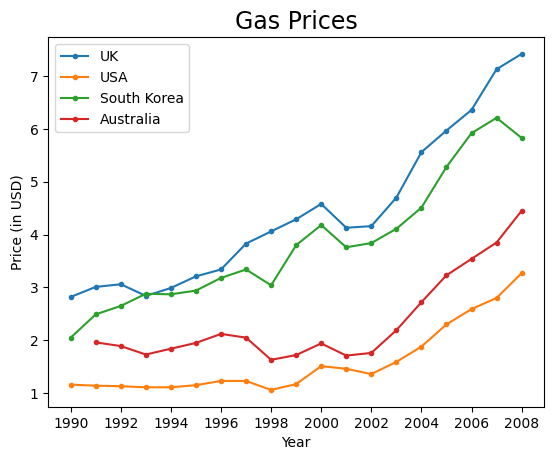

In [3]:
gdata = pd.read_csv("/Users/Sakib/Downloads/gas_prices.csv")
plt.plot(gdata["Year"],gdata["UK"],label="UK",marker=".")
plt.plot(gdata["Year"],gdata["USA"],label="USA",marker=".")
plt.plot(gdata["Year"],gdata["South Korea"],label="South Korea",marker=".")
plt.plot(gdata["Year"],gdata["Australia"],label="Australia",marker=".")
plt.xticks(np.arange(1990,2010,2))
plt.title("Gas Prices",fontdict={"fontsize":17})
plt.xlabel("Year")
plt.ylabel("Price (in USD)")

plt.legend()
plt.show()

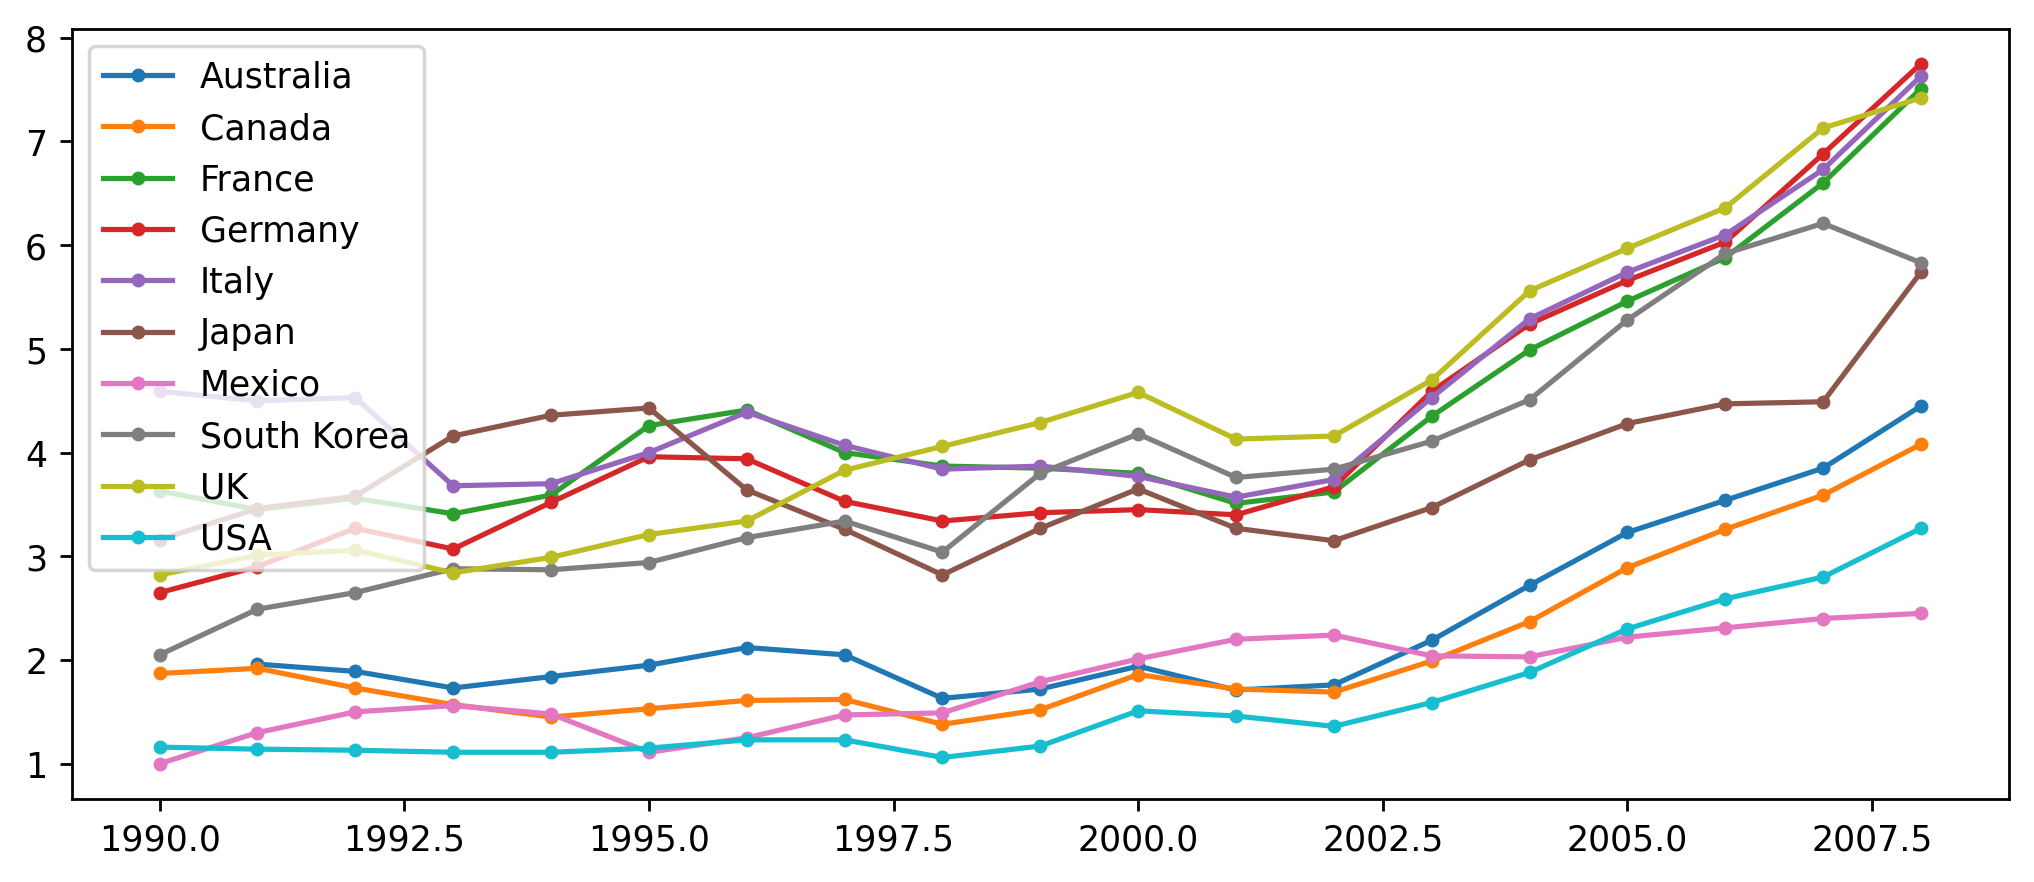

In [4]:
plt.figure(figsize=(10,4),dpi=250)
for country in gdata:
  if country != "Year":
    plt.plot(gdata["Year"],gdata[country],label=country,marker=".")
plt.legend()
plt.show()

In [5]:
football = pd.read_csv("/Users/Sakib/Downloads/fifa_data.csv")
football.head(5)  

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


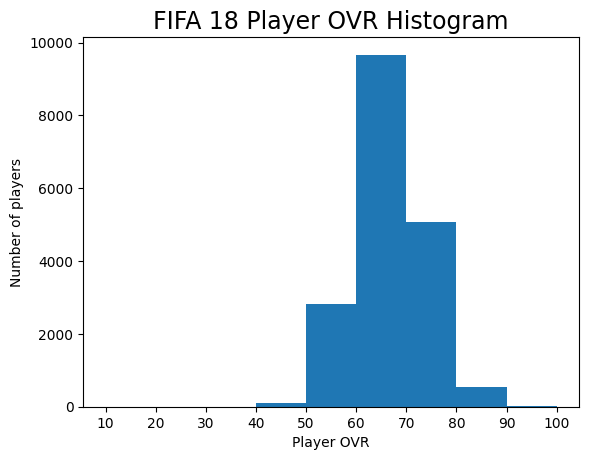

In [6]:
bin = np.arange(10,101,10)
plt.hist(football["Overall"],bins=bin)
plt.xticks(bin)
plt.xlabel("Player OVR")
plt.ylabel("Number of players")
plt.title("FIFA 18 Player OVR Histogram",fontdict={"fontsize":17})

plt.show()

In [7]:
football.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
left = football[football["Preferred Foot"]=="Left"].count()[0]
right = football.query('`Preferred Foot` == "Right"').count()[0]   
# Use ` ` when the name takes more than one words without _


/var/folders/5d/lg81w70d4hq4sn12njbwhfyr0000gp/T/ipykernel_91554/752743394.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = football[football["Preferred Foot"]=="Left"].count()[0]
/var/folders/5d/lg81w70d4hq4sn12njbwhfyr0000gp/T/ipykernel_91554/752743394.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = football.query('`Preferred Foot` == "Right"').count()[0]


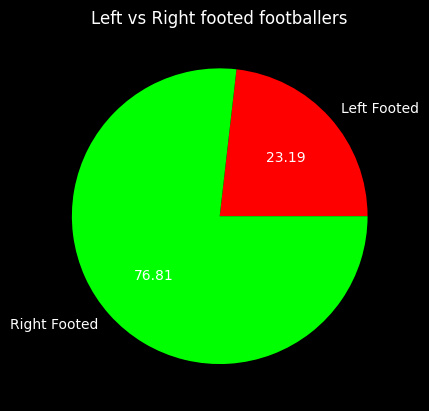

In [13]:
plt.style.use("dark_background")
plt.pie([left,right],labels=["Left Footed","Right Footed"],colors=["Red","Lime"],autopct="%.2f")
plt.title("Left vs Right footed footballers")
plt.show()

Text(0, 0.5, 'Number of players')

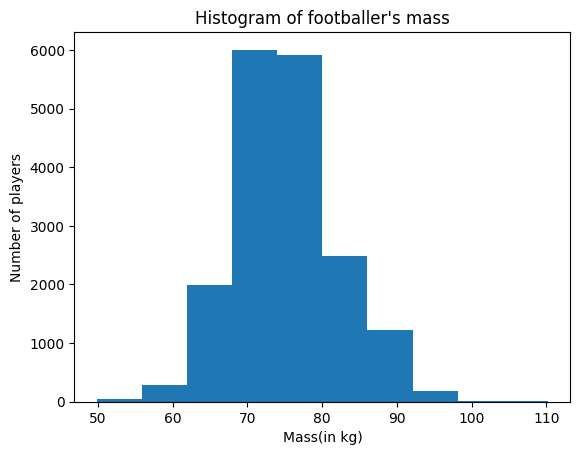

In [29]:
football["Weight"] = [int(x.strip("lbs")) if type(x)==str else x for x in football["Weight"]]
football["Weight"] = football.Weight/2.205

plt.hist(football["Weight"])
plt.title("Histogram of footballer's mass")
plt.xlabel("Mass(in kg)")
plt.ylabel("Number of players")

In [49]:
# Special Parameters of plt.hist() function:
## bins: The number of bins to be used in the histogram

Text(0.5, 1.0, 'Mass of footballers')

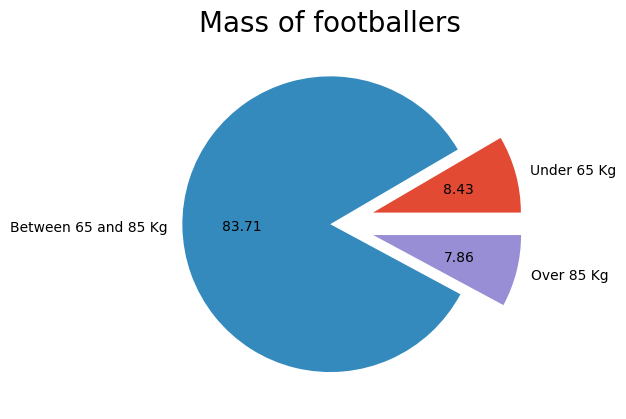

In [47]:
plt.style.use("ggplot")
light = football[football["Weight"]<=65].count()[0]
medium = football[(football["Weight"]>65) & (football["Weight"]<85)].count()[0]
heavy = football[football.Weight>=85].count()[0]
plt.pie([light,medium,heavy],labels=["Under 65 Kg","Between 65 and 85 Kg","Over 85 Kg"],autopct="%.2f",explode=(.3,0,.3))
plt.title("Mass of footballers",fontdict={"fontsize":20})

In [48]:
# Special Parameters of plt.pie() function:

## autopct # to display the percentage of each wedge

## labels=[] # labels for each wedge

## autopct='%.2f' # format string for the percentage display

## explode=[] # to "explode" a wedge out of the pie chart

## pctdistance=0.85 # distance of the percentage label from the center of the pie chart

In [52]:
football.head(50)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


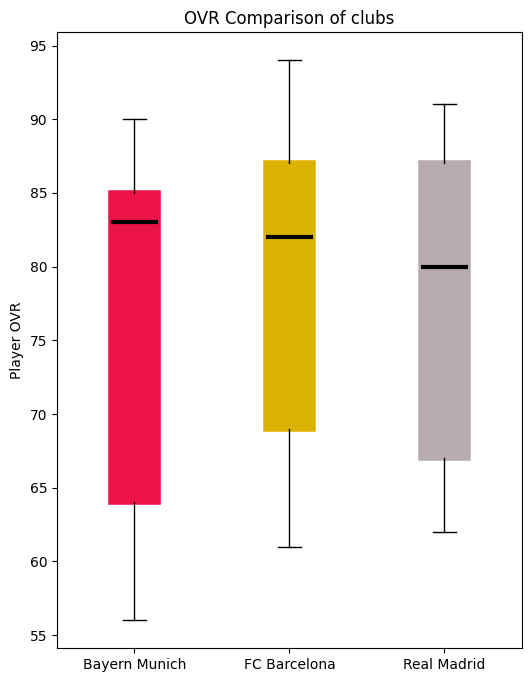

In [96]:
plt.style.use("default")
plt.figure(figsize=(6,8))
barca = football.query("Club == 'FC Barcelona'")["Overall"]
bayern = football.query("Club == 'FC Bayern München'")["Overall"]
vadrid = football.query("Club == 'Real Madrid'")["Overall"]
boxes = plt.boxplot([bayern,barca,vadrid],patch_artist=True,labels=["Bayern Munich","FC Barcelona","Real Madrid"],medianprops={"linewidth":3,"color":"Black"})
colors = ["#ec1349","#dcb305","#b8abaf"]
for i,bar in enumerate(boxes["boxes"]):
  bar.set(color=colors[i],linewidth=4)
plt.title("OVR Comparison of clubs")
plt.ylabel("Player OVR")

plt.show()